In [77]:
#Importing packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use("classic")

df = pd.read_csv("DataScientist.csv")
df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [78]:
#checking Null values
df.isnull()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [79]:
#Show columns 
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [80]:
#Dropping the first column in the dataset
df.drop([df.columns[0]],axis=1,inplace=True)
df.drop(['Job Description','Industry','Competitors'],axis=1,inplace=True)

In [81]:
#Creating Lowest and Highest wage columns
df_wage = df['Salary Estimate'].str.split("-",expand=True,)

Lowest_wage = df_wage[0]
Lowest_wage = Lowest_wage.str.replace('K',' ')

# Removes string values
Highest_wage = df_wage[1].str.replace('(Glassdoor est.)', ' ')
Highest_wage = Highest_wage.str.replace('(', ' ')
Highest_wage = Highest_wage.str.replace(')', ' ')
Highest_wage = Highest_wage.str.replace('K', ' ')
Highest_wage = Highest_wage.str.replace('Employer est.', ' ')
Highest_wage = Highest_wage.str.replace('Per Hour', ' ')

# Removes dollar sign from columns
Highest_wage = Highest_wage.str.replace('$', ' ').fillna(0).astype(int)
Lowest_wage = Lowest_wage.str.replace('$', ' ').fillna(0).astype(int)

In [82]:
Highest_wage.value_counts()

144    120
175     93
151     92
122     90
140     90
      ... 
185      7
53       7
173      6
26       3
74       1
Name: 1, Length: 97, dtype: int64

In [83]:
#Applies Lowest Wage Variable and Highest Wage variable to the new columns
df['Lowest Wage'] = Lowest_wage
df['Highest Wage'] = Highest_wage


In [84]:
df

,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Revenue,Easy Apply,Lowest Wage,Highest Wage
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel & Tourism,Unknown / Non-Applicable,-1,111,181
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,Consumer Services,Unknown / Non-Applicable,-1,111,181
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,Unknown / Non-Applicable,True,111,181
3,3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Information Technology,Unknown / Non-Applicable,-1,111,181
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Business Services,Unknown / Non-Applicable,-1,111,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,Information Technology,$10 to $25 million (USD),-1,55,112
3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,Information Technology,$50 to $100 million (USD),-1,55,112
3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Business Services,$100 to $500 million (USD),-1,55,112
3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting & Legal,Less than $1 million (USD),-1,55,112


In [85]:
# Creating City and State Columns
Location = df['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
df['Location City'] = Location_City
df['Location State'] = Location_State
df.drop('Location',axis = 1, inplace = True)

HQ = df['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
df['Headquarters City'] = Headquarters_City
df['Headquarters State'] = Headquarters_State
df.drop('Headquarters',axis = 1, inplace = True)


In [86]:
df

,index,Job Title,Salary Estimate,Rating,Company Name,Size,Founded,Type of ownership,Sector,Revenue,Easy Apply,Lowest Wage,Highest Wage,Location City,Location State,Headquarters City,Headquarters State
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,501 to 1000 employees,2007,Company - Private,Travel & Tourism,Unknown / Non-Applicable,-1,111,181,New York,NY,Montreal,Canada
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,1001 to 5000 employees,2008,Company - Private,Consumer Services,Unknown / Non-Applicable,-1,111,181,New York,NY,New York,NY
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,1 to 50 employees,-1,Unknown,-1,Unknown / Non-Applicable,True,111,181,New York,NY,New York,NY
3,3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,201 to 500 employees,2019,Company - Private,Information Technology,Unknown / Non-Applicable,-1,111,181,Lyndhurst,NJ,Lyndhurst,NJ
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,51 to 200 employees,2007,Company - Private,Business Services,Unknown / Non-Applicable,-1,111,181,New York,NY,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies\n4.4,201 to 500 employees,2011,Company - Private,Information Technology,$10 to $25 million (USD),-1,55,112,Dublin,OH,Irving,TX
3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC\n5.0",51 to 200 employees,2008,Company - Private,Information Technology,$50 to $100 million (USD),-1,55,112,Columbus,OH,Woodridge,IL
3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),3.8,"PDS Tech, Inc.\n3.8",5001 to 10000 employees,1977,Company - Private,Business Services,$100 to $500 million (USD),-1,55,112,Dublin,OH,Irving,TX
3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),4.0,Data Resource Technologies\n4.0,1 to 50 employees,-1,Company - Private,Accounting & Legal,Less than $1 million (USD),-1,55,112,Dublin,OH,Omaha,NE


In [87]:
# Display unique job titles
print('\n','The unique job titles are :',df['Job Title'].unique())


 The unique job titles are : ['Senior Data Scientist' 'Data Scientist, Product Analytics'
 'Data Science Manager' ... 'Cyber Security Data Engineer'
 'Security Analytics Data Engineer'
 'Patient Safety Physician or Safety Scientist - UK, Europe or the US']


In [88]:
#Job Title Pre-processing
df['Job Title'] = df['Job Title'].str.replace(","," ")
df['Job Title'] = df['Job Title'].str.replace("/"," ")
df['Job Title'] = df['Job Title'].str.replace("-"," ")
df['Job Title'] = df['Job Title'].str.replace("#NAME?"," ")
df['Job Title'] = df['Job Title'].str.replace("with"," ")


#Type of ownership pre-processing 
df['Type of ownership'] = df['Type of ownership'].apply(lambda x:x.split()[-1])
df['Type of ownership'] = df['Type of ownership'].replace(['Unknown'],np.nan)


#Easy Apply Pre-processing 
df['Easy Apply'] = df['Easy Apply'].replace(['-1'],'False')
df['Easy Apply'] = df['Easy Apply'].replace(['TRUE'],'True')


#Revenue Pre-processing 
df['Revenue'] = df['Revenue'].apply(lambda x:x.split()[-1])
#Function for Revenue - Pre-processing 
def isrevenue(x):
    if x=="Non-Applicable":
        return 0
    elif x=="(USD)":
        return 1
#Applying the function to Revenue 
df['Revenue']=df['Revenue'].apply(isrevenue)


#Sector Pre-processing 
#Converting the -1 input into a NAN 
df['Sector'] = df['Sector'].replace(['-1'],np.nan)


#Founded Pre-processing 
df['Founded'] = df['Founded'].replace([-1],np.nan)

#Rating Pre-processing 
df['Rating'] = df['Rating'].replace([-1],np.nan)

#Company Name Pre-processing
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')

In [89]:
df

,index,Job Title,Salary Estimate,Rating,Company Name,Size,Founded,Type of ownership,Sector,Revenue,Easy Apply,Lowest Wage,Highest Wage,Location City,Location State,Headquarters City,Headquarters State
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper,501 to 1000 employees,2007.0,Private,Travel & Tourism,0.0,False,111,181,New York,NY,Montreal,Canada
1,1,Data Scientist Product Analytics,$111K-$181K (Glassdoor est.),4.5,Noom US,1001 to 5000 employees,2008.0,Private,Consumer Services,0.0,False,111,181,New York,NY,New York,NY
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),NaN,Decode_M,1 to 50 employees,NaN,NaN,NaN,0.0,True,111,181,New York,NY,New York,NY
3,3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital,201 to 500 employees,2019.0,Private,Information Technology,0.0,False,111,181,Lyndhurst,NJ,Lyndhurst,NJ
4,4,Director Data Science,$111K-$181K (Glassdoor est.),3.4,United Entertainment Group,51 to 200 employees,2007.0,Private,Business Services,0.0,False,111,181,New York,NY,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies,201 to 500 employees,2011.0,Private,Information Technology,1.0,False,55,112,Dublin,OH,Irving,TX
3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC",51 to 200 employees,2008.0,Private,Information Technology,1.0,False,55,112,Columbus,OH,Woodridge,IL
3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),3.8,"PDS Tech, Inc.",5001 to 10000 employees,1977.0,Private,Business Services,1.0,False,55,112,Dublin,OH,Irving,TX
3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),4.0,Data Resource Technologies,1 to 50 employees,NaN,Private,Accounting & Legal,1.0,False,55,112,Dublin,OH,Omaha,NE


In [90]:
#Dropping NaN values
df = df.dropna(how='any',axis=0)
df = df.reset_index(drop=True)

In [91]:
#Function to covert string into an integer 

def convert_Sqft_to_Num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [92]:
#Size Pre-processing
df['Size'] = df['Size'].replace([-1],np.nan)
df['Size'] = df['Size'].apply(lambda x:x.replace('to','-'))
df['Size'] = df['Size'].apply(lambda x:x.replace('+',' - 0'))
df['Size'] = df['Size'].apply(lambda x:x.replace('employees',' '))
df['Size'] = df['Size'].apply(convert_Sqft_to_Num)


In [93]:
df

,index,Job Title,Salary Estimate,Rating,Company Name,Size,Founded,Type of ownership,Sector,Revenue,Easy Apply,Lowest Wage,Highest Wage,Location City,Location State,Headquarters City,Headquarters State
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper,750.5,2007.0,Private,Travel & Tourism,0.0,False,111,181,New York,NY,Montreal,Canada
1,1,Data Scientist Product Analytics,$111K-$181K (Glassdoor est.),4.5,Noom US,3000.5,2008.0,Private,Consumer Services,0.0,False,111,181,New York,NY,New York,NY
2,3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital,350.5,2019.0,Private,Information Technology,0.0,False,111,181,Lyndhurst,NJ,Lyndhurst,NJ
3,4,Director Data Science,$111K-$181K (Glassdoor est.),3.4,United Entertainment Group,125.5,2007.0,Private,Business Services,0.0,False,111,181,New York,NY,New York,NY
4,5,Data Scientist,$111K-$181K (Glassdoor est.),2.9,IFG Companies,350.5,1985.0,Private,Insurance,0.0,False,111,181,New York,NY,Hartford,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,4373,Columbus Data Science Tutor Jobs,$55K-$112K (Glassdoor est.),4.2,Varsity Tutors,350.5,2007.0,Private,Information Technology,0.0,False,55,112,Columbus,OH,Saint Louis,MO
2858,4374,Cyber Security Data Engineer,$55K-$112K (Glassdoor est.),3.9,ApTask,350.5,2010.0,Private,Information Technology,1.0,False,55,112,Dublin,OH,Iselin,NJ
2859,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies,350.5,2011.0,Private,Information Technology,1.0,False,55,112,Dublin,OH,Irving,TX
2860,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC",125.5,2008.0,Private,Information Technology,1.0,False,55,112,Columbus,OH,Woodridge,IL


/Users/juniorturpin/opt/anaconda3/envs/Tensorflow2/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/juniorturpin/opt/anaconda3/envs/Tensorflow2/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


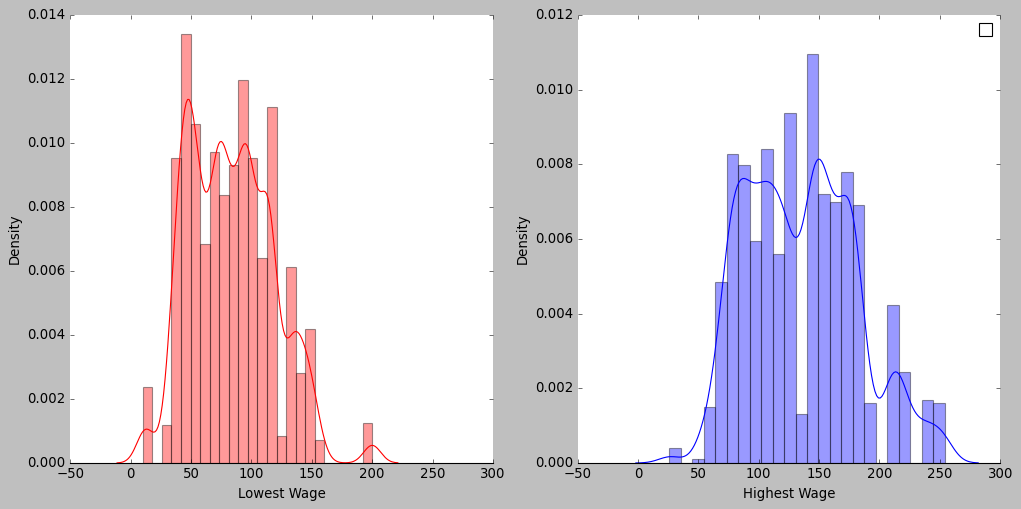

In [94]:
#Creating histogram visualisation
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(df['Lowest Wage'],color = 'r',ax = axes[0])
sns.distplot(df['Highest Wage'],ax = axes[1])
plt.legend();

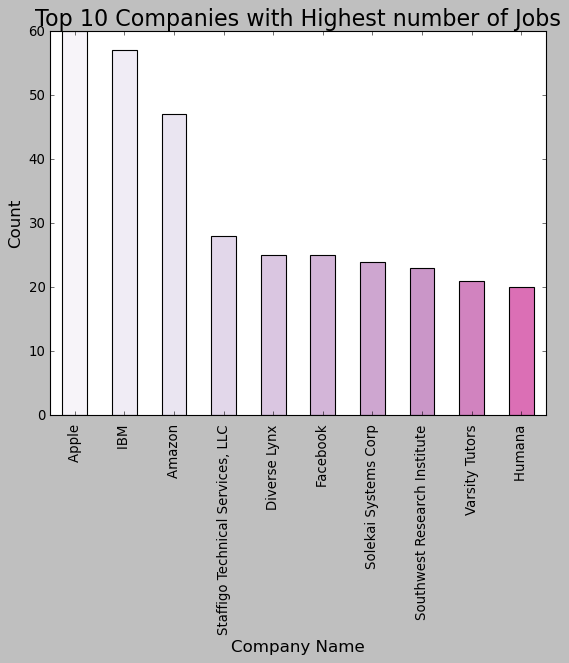

In [95]:
#Setting colour for visualisations
color = plt.cm.PuRd(np.linspace(0,1,20))

#Creating visualisation
df["Company Name"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=color)
plt.title("Top 10 Companies with Highest number of Jobs",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

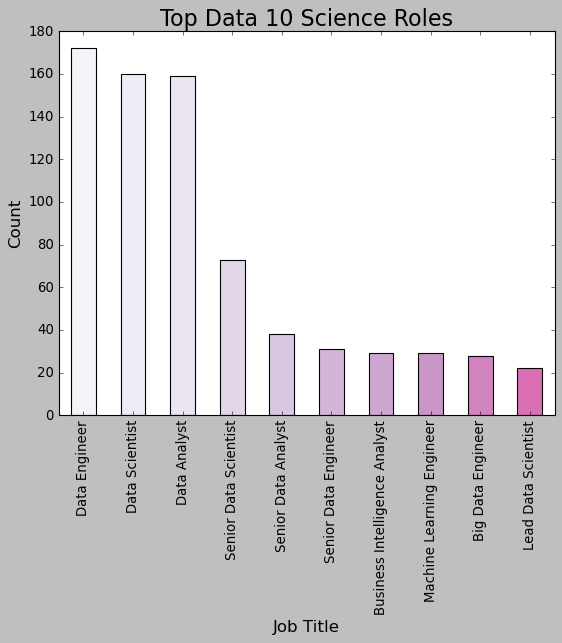

In [96]:
#Creating visualisation
df["Job Title"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=color)
plt.title("Top Data 10 Science Roles",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

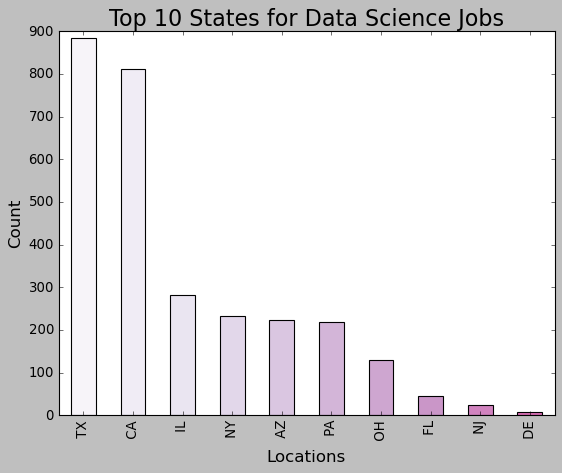

In [97]:
#Creating visualisation
df["Location State"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=color)
plt.title("Top 10 States for Data Science Jobs",fontsize=20)
plt.xlabel("Locations",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

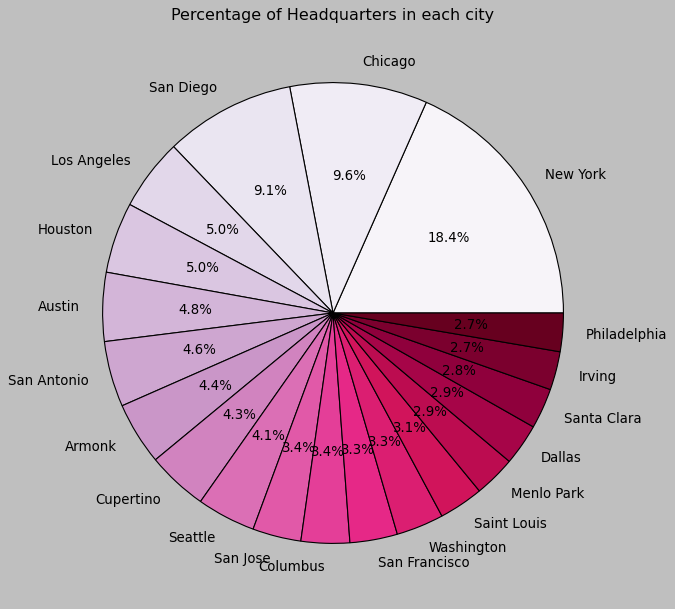

In [98]:
#Creating visualisation
plt.rcParams["figure.figsize"] = (12,9)
df["Headquarters City"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="Headquarters",colors=color,autopct="%0.1f%%")
plt.title("Percentage of Headquarters in each city")
plt.axis("off")
plt.show()

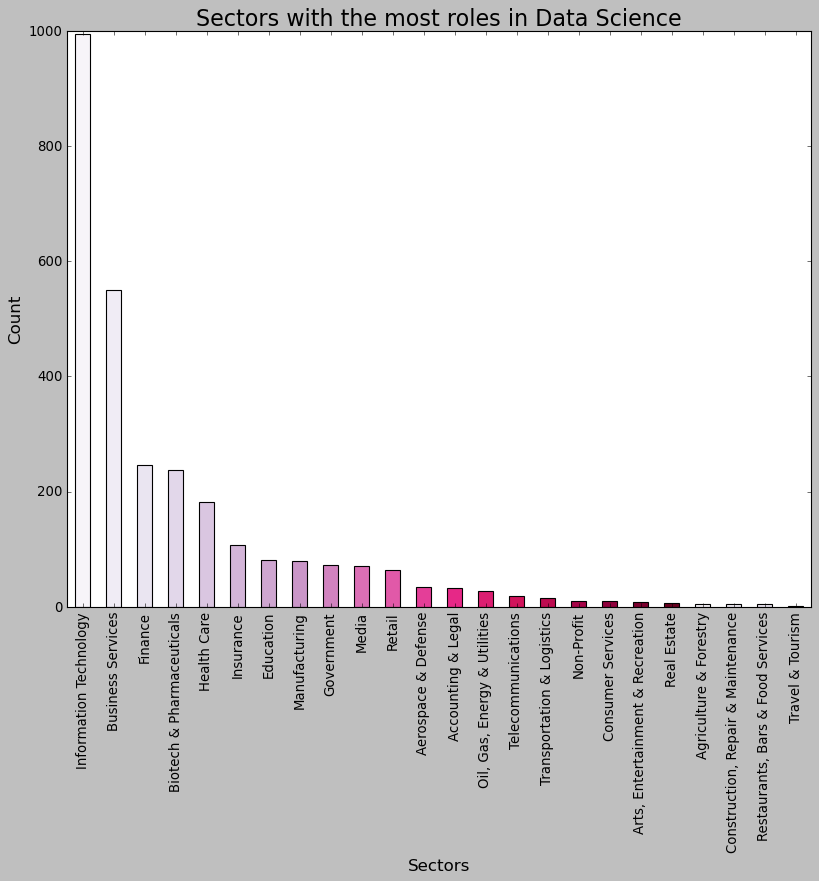

In [99]:
#Creating visualisation
df["Sector"].value_counts().sort_values(ascending=False).plot.bar(color=color)
plt.title("Sectors with the most roles in Data Science",fontsize=20)
plt.xlabel("Sectors",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

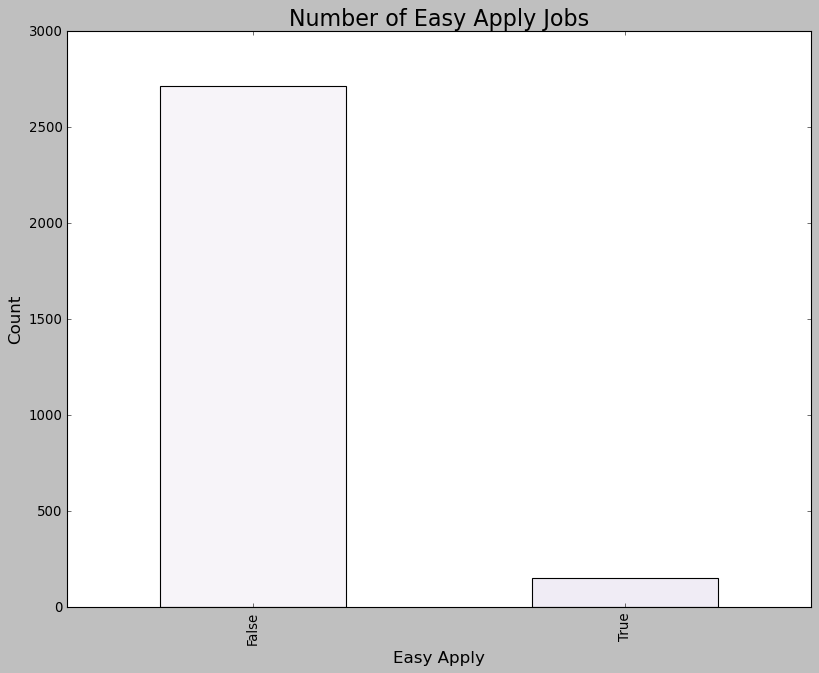

In [100]:
#Creating visualisation
df["Easy Apply"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=color)
plt.title("Number of Easy Apply Jobs",fontsize=20)
plt.xlabel("Easy Apply",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [101]:
#Creating visualisation
fig = px.scatter(df, x=df['Rating'], y= df['Highest Wage'])
fig.update_layout(title = 'Relation between the highest wage and rating of companies')
fig.show()

In [102]:
#Creating visualisation
fig = px.scatter(df, x=df['Rating'], y= df['Lowest Wage'])
fig.update_layout(title = 'Relation between the lowest wage and rating of companies')
fig.show()

In [103]:
#creating ownership count variable
ownership = pd.DataFrame(df['Type of ownership'].value_counts())

#Creating visualisation
fig = px.pie(ownership, values=ownership['Type of ownership'], names=ownership.index)
fig.update_layout(title = 'Type of ownership')
fig.show()